<a href="https://colab.research.google.com/github/onuralpArsln/MlAiTutorialProjects/blob/main/12-VideoSources/seabornVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Bu not defterinde:
 - "Tips" veri kümesine benzer bir CSV dosyasını yükleyeceğiz.
 - **pandas** kullanarak veriyi keşfedecek ve temizleyeceğiz.
 - **seaborn** ve **matplotlib** kullanarak gelişmiş grafiklerle veriyi görselleştireceğiz.

In [1]:
# Kütüphaneler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Seaborn için güzel bir tema ayarlayalım
sns.set_theme(style="whitegrid")

## Veri Hazırlama

 Bu örnek için, restoran bahşişlerini içeren örnek bir CSV dosyası oluşturuyoruz.
 Kendi CSV dosyanızı kullanmak isterseniz, oluşturma adımını atlayıp dosyanızı yükleyebilirsiniz.
 Burada csv dosyalarını elimizdeki datadan oluşturmayı görüyoruz.


In [2]:
# Örnek DataFrame oluşturma
data = {
    'hesap': [16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77, 26.88, 15.04, 14.78,
                   34.00, 17.50, 22.30, 12.45, 18.65, 28.75, 19.80, 11.00, 27.30, 13.90],
    'bahsis': [1.01, 1.66, 3.50, 3.31, 3.61, 4.71, 2.00, 3.12, 1.96, 3.23,
            5.00, 2.50, 4.00, 2.10, 3.40, 4.80, 3.00, 1.50, 4.20, 2.80],
    'cnsiyet': ['Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male',
            'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'sigara tüketimi': ['No'] * 20,
    'gün': ['Sun'] * 10 + ['Sat'] * 10,
    # İlk 10 kayıt için öğle, sonraki 10 kayıt için akşam yemeği
    'öğün': ['Öğle Yemeği'] * 10 + ['Akşam Yemeği'] * 10,
    'kişi sayısı': [2, 3, 3, 2, 4, 4, 2, 4, 2, 2,
             4, 2, 3, 2, 4, 5, 2, 3, 4, 2]
}


# datadan bir csv dosyası oluşturuyrouz
df = pd.DataFrame(data)

# DataFrame'i CSV dosyası olarak kaydetme
csv_filename = 'sample.csv'
df.to_csv(csv_filename, index=False)
print(f"CSV dosyası '{csv_filename}' başarıyla oluşturuldu!")


CSV dosyası 'sample.csv' başarıyla oluşturuldu!


Artık bu dataları bir csv yaptığımız için, csvden okuma yapabilriz. Elinde bir csv dosyası var ise aynı şekilde okuman mümkün.

In [3]:
# CSV dosyasını yükleme
df = pd.read_csv(csv_filename)


Pandas kullanarak veriyi biraz inceleyelim

In [4]:
# Veri kümesinin ilk birkaç satırını görüntüleme
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Öğle Yemeği,2
1,10.34,1.66,Male,No,Sun,Öğle Yemeği,3
2,21.01,3.50,Male,No,Sun,Öğle Yemeği,3
3,23.68,3.31,Male,No,Sun,Öğle Yemeği,2
4,24.59,3.61,Female,No,Sun,Öğle Yemeği,4


In [5]:
# Veri kümesine ait temel bilgilerin görüntülenmesi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  20 non-null     float64
 1   tip         20 non-null     float64
 2   sex         20 non-null     object 
 3   smoker      20 non-null     object 
 4   day         20 non-null     object 
 5   time        20 non-null     object 
 6   size        20 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 1.2+ KB


In [ ]:
# Veri kümesinin istatistiksel özetinin görüntülenmesi
df.describe()

## Seaborn ve Matplotlib ile Veri Görselleştirme
Şimdi verideki çeşitli özellikleri göstermek için bir dizi grafik oluşturalım.

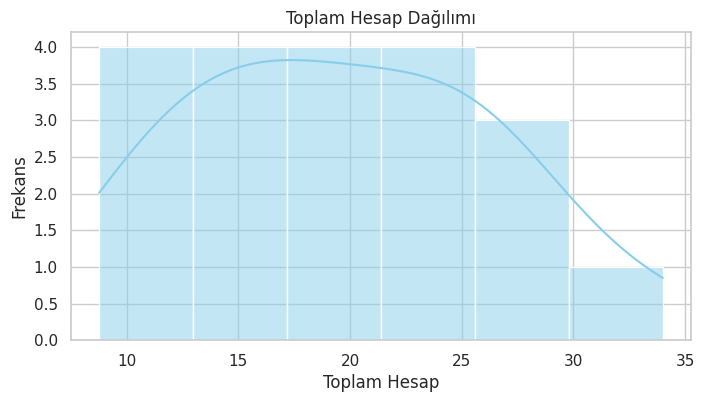

In [8]:
# Toplam hesap dağılımı
plt.figure(figsize=(8, 4))
sns.histplot(df['total_bill'], kde=True, color="skyblue")
plt.title("Toplam Hesap Dağılımı")
plt.xlabel("Toplam Hesap")
plt.ylabel("Frekans")
plt.show()

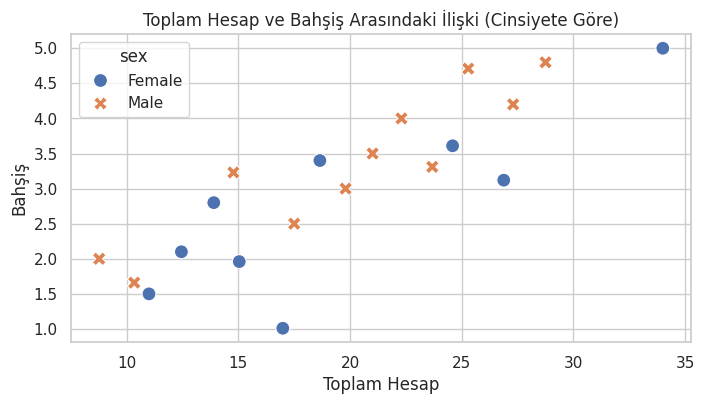

In [9]:
# Toplam hesap ve bahşiş arasındaki ilişkiyi gösteren saçılma grafiği
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', style='sex', s=100)
plt.title("Toplam Hesap ve Bahşiş Arasındaki İlişki (Cinsiyete Göre)")
plt.xlabel("Toplam Hesap")
plt.ylabel("Bahşiş")
plt.show()

<ipython-input-10-a782ff8640e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='total_bill', palette="Pastel1")


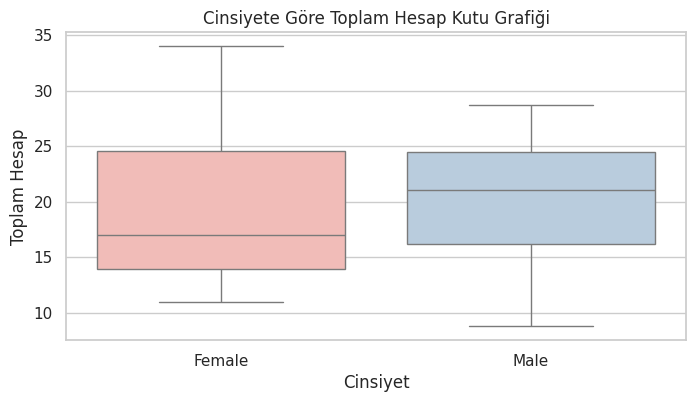

In [10]:
# Cinsiyete göre toplam hesap dağılımını gösteren kutu grafiği
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='sex', y='total_bill', palette="Pastel1")
plt.title("Cinsiyete Göre Toplam Hesap Kutu Grafiği")
plt.xlabel("Cinsiyet")
plt.ylabel("Toplam Hesap")
plt.show()

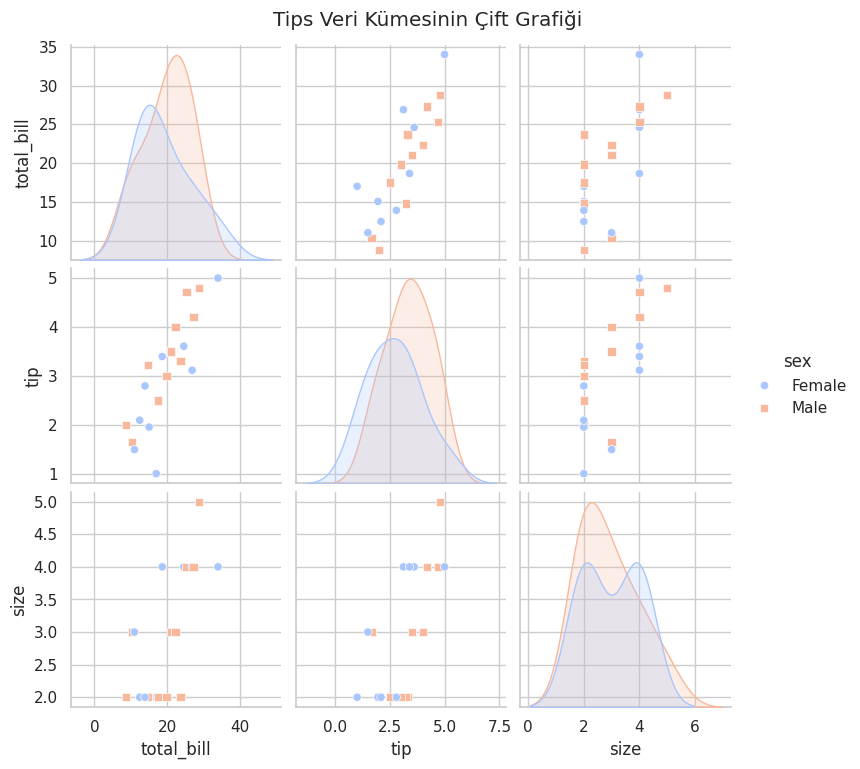

In [12]:
# Tüm sayısal değişkenler arasındaki ilişkileri keşfetmek için çift grafiği
sns.pairplot(df, hue='sex', palette="coolwarm", markers=["o", "s"])
plt.suptitle("Tips Veri Kümesinin Çift Grafiği", y=1.02)
plt.show()

<ipython-input-13-1293b9d42b14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sex', y='total_bill', palette="Set2", inner="quartile")


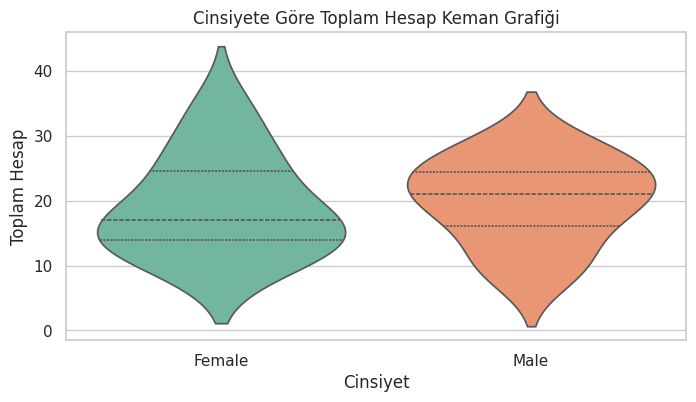

In [13]:
# Keman grafiği: Kutu grafiği ve yoğunluk grafiğinin birleşimi
plt.figure(figsize=(8, 4))
sns.violinplot(data=df, x='sex', y='total_bill', palette="Set2", inner="quartile")
plt.title("Cinsiyete Göre Toplam Hesap Keman Grafiği")
plt.xlabel("Cinsiyet")
plt.ylabel("Toplam Hesap")
plt.show()

<ipython-input-11-3232fe1b2330>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='total_bill', y='day', inner='stick', palette='Dark2')


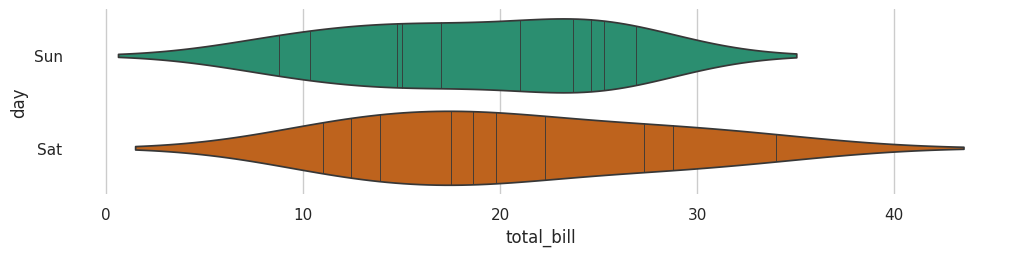

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='total_bill', y='day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-14-51ff67b17246>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day', y='total_bill', palette="Pastel2", showfliers=False)


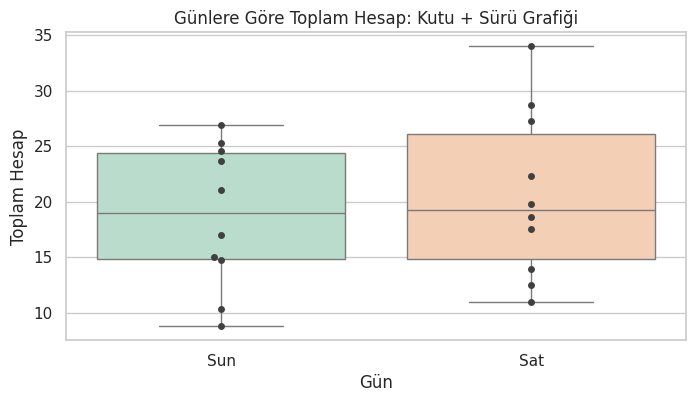

In [14]:
# Sürü grafiği: Kutu grafiği üzerine bireysel gözlemleri gösterir
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='day', y='total_bill', palette="Pastel2", showfliers=False)
sns.swarmplot(data=df, x='day', y='total_bill', color=".25")
plt.title("Günlere Göre Toplam Hesap: Kutu + Sürü Grafiği")
plt.xlabel("Gün")
plt.ylabel("Toplam Hesap")
plt.show()


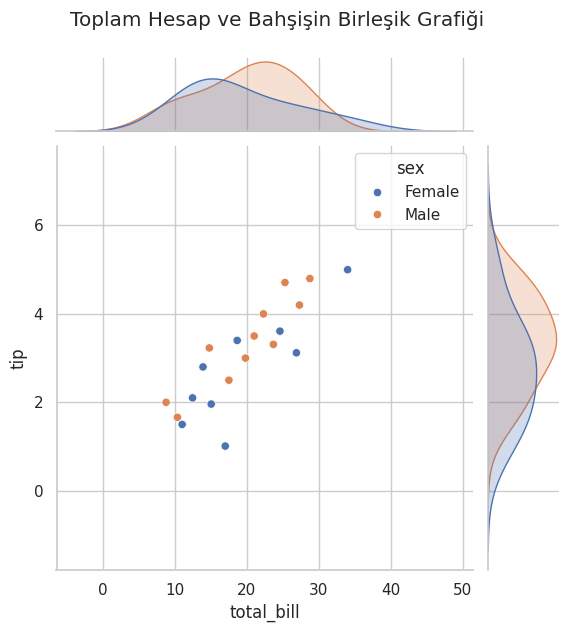

In [15]:
# Birleşik grafik: Toplam hesap ve bahşiş arasındaki ilişkiyi kenar dağılımları ile gösterir
sns.jointplot(data=df, x='total_bill', y='tip', kind="scatter", hue='sex', palette="deep")
plt.suptitle("Toplam Hesap ve Bahşişin Birleşik Grafiği", y=1.05)
plt.show()


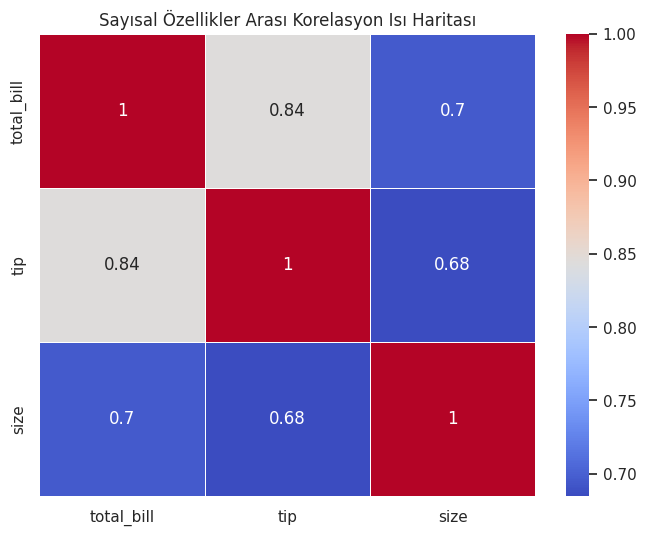

In [16]:


# Isı haritası: Sayısal değişkenlerin korelasyon matrisini görselleştirir
plt.figure(figsize=(8, 6))
corr = df[['total_bill', 'tip', 'size']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Sayısal Özellikler Arası Korelasyon Isı Haritası")
plt.show()

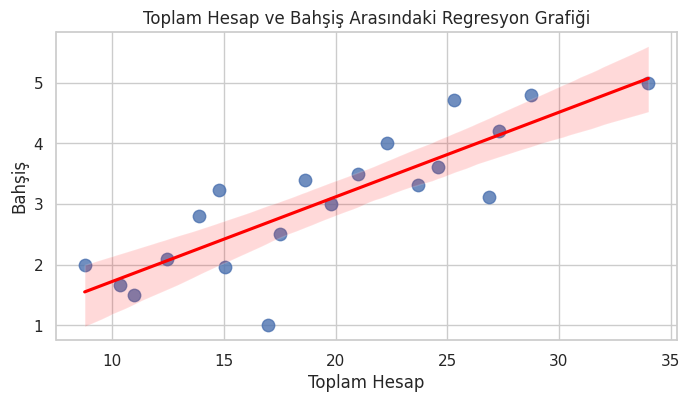

In [17]:
# Regresyon grafiği: Toplam hesap ve bahşiş arasındaki doğrusal ilişkiyi gösterir
plt.figure(figsize=(8, 4))
sns.regplot(data=df, x='total_bill', y='tip', scatter_kws={'s': 80}, line_kws={'color': 'red'})
plt.title("Toplam Hesap ve Bahşiş Arasındaki Regresyon Grafiği")
plt.xlabel("Toplam Hesap")
plt.ylabel("Bahşiş")
plt.show()

<ipython-input-18-8789343af4c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day', palette="Blues_d")


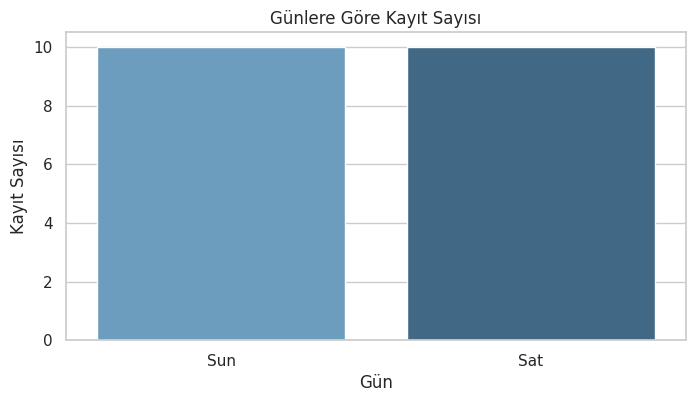

In [18]:
# Kayıt sayısı grafiği: Her güne ait kayıt sayısını gösterir
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='day', palette="Blues_d")
plt.title("Günlere Göre Kayıt Sayısı")
plt.xlabel("Gün")
plt.ylabel("Kayıt Sayısı")
plt.show()